# Elite  Hitters

Udacity Project: Investigate a Dataset

by: Eric Curiel

Part1:
Analysis of the top players in a given sport can help uncover useful insights for both the individual and team. In this analysis, I’ll primarily look at characteristics of “elite hitters.”  For the sake of this report, an “elite hitter” is a baseball player who bats in the top 5% of the MLB for runs, hits in the top 5% for home runs, or does both. The data utilized in this report refers to runs as ‘R’ and home runs as ‘HR’, and I’ll follow this convention where applicable. 

Part 2:
Later in the analysis of elite hitters, I will make an investigation into the statistical impact of performance-enhancing drugs on the overall population of elite hitters. I created a csv file from the suspend players listed on Wikipedia website referenced at the end of this report. 

The questions this report looks to answer are as follows:

•	What is the average age of an elite HR or R hitter?

•	What are other characteristics of elite hitters (i.e. height and weight)?

•	How do characteristics of elite R hitters differ from elite HR hitters?

•	What percent of elite hitters are both elite in HR and R hitting?

•	What is the correlation between elite HR/elite run hitters with height, weight, and year?

•	How has the performance of elite hitters changed over time?

Questions for Part 2 of this report:

•	Since 1980, how have performance- enhancing drugs impacted performance statistics for elite HR and R hitters?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data
batting = pd.read_csv('/Users/cure51/Downloads/baseballdatabank-master/core/Batting.csv')
master = pd.read_csv('/Users/cure51/Downloads/baseballdatabank-master/core/Master.csv')

# Merging data to so player hitting statistics and player characteristics are in one table.
batting_and_players = master.merge(batting, on='playerID', how='inner')
batting_and_players.head()

# Merging tables on 'playerID' to aggergate data on each player for a given baseball season. 
#"master" contains 187 more playerIDs than "batting", potentially due to their lack of particpation in offense. 
len(master['playerID'].unique()) - len(batting['playerID'].unique())
len(batting_and_players['playerID'].unique())



18659

In [2]:
# The following code is used to generate a player's age in a new coloumn. Player's age will be age at the start of the season (baseball season starts in April). 
# lambda is used in conjunction with .apply in order to pass in the 3 columns as the variables for the player_age function.
def player_age(birthYear, birthMonth, yearID):
    if birthMonth > 4:
        age_year = (yearID - birthYear) - 1
        age_month = 12 - birthMonth
        player_age = age_year + (age_month/12.00)
        return player_age
    elif birthMonth <= 4:
        age_year = yearID - birthYear
        age_month = 4 - birthMonth
        player_age = age_year + (age_month/12.00)
        return player_age
    else:
        return 0

In [3]:
batting_and_players['age_at_season_start'] = batting_and_players.apply(lambda x: player_age(x['birthYear'], x['birthMonth'], x['yearID']), axis=1)
batting_and_players.head(5)
batting_and_players.columns

Index([u'playerID', u'birthYear', u'birthMonth', u'birthDay', u'birthCountry',
       u'birthState', u'birthCity', u'deathYear', u'deathMonth', u'deathDay',
       u'deathCountry', u'deathState', u'deathCity', u'nameFirst', u'nameLast',
       u'nameGiven', u'weight', u'height', u'bats', u'throws', u'debut',
       u'finalGame', u'retroID', u'bbrefID', u'yearID', u'stint', u'teamID',
       u'lgID', u'G', u'AB', u'R', u'H', u'2B', u'3B', u'HR', u'RBI', u'SB',
       u'CS', u'BB', u'SO', u'IBB', u'HBP', u'SH', u'SF', u'GIDP',
       u'age_at_season_start'],
      dtype='object')

In [4]:
# Testing output of player_age function proves to have discrepancies with age expectation. 
batting_and_players['age_at_season_start'].min()
batting_and_players['age_at_season_start'].argmin()

# Upon further investigation, issue with the data are seen.
# For example, the 'yearID' for 'playerID' johnsbi01 shows a 'birthYear' of 1861; yet he played in the 1980's and his 'deathYear' shows as 1942.
batting_and_players[batting_and_players['playerID'] == 'johnsbi01']

# The code below removes erroneous rows for player ages that are over below 15 years of age or over 65 years of age.
batting_and_players_clean = batting_and_players.ix[batting_and_players['age_at_season_start'] < 65].ix[batting_and_players['age_at_season_start'] > 15]
# To check of the code worked:
print batting_and_players_clean['age_at_season_start'].max(), batting_and_players_clean['age_at_season_start'].min()

batting_and_players_clean.head()


58.4166666667 15.4166666667


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,age_at_season_start
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [5]:
# Group by baseball season (which is same as 'yearID')
grouped_season = batting_and_players_clean.groupby('yearID')

# Create a new DataFrame for top 5% run hitters and another for top 5% home run hitters. 
top_five_percent_runs = pd.DataFrame(grouped_season['R'].quantile(.95))
top_five_percent_HR = pd.DataFrame(grouped_season['HR'].quantile(.95))

print top_five_percent_HR['HR'].head()
print ""
print top_five_percent_runs['R'].head()

yearID
1871    2.00
1872    2.00
1873    2.00
1874    2.00
1875    1.85
Name: HR, dtype: float64

yearID
1871    45.00
1872    71.10
1873    79.20
1874    73.05
1875    75.40
Name: R, dtype: float64


In [6]:
# Add 'yearID' coloumn to top_five_percent_HR/runs. This will create the coloumn that will be used to eventually merge. 
top_five_percent_HR['yearID'] = top_five_percent_HR.index
top_five_percent_runs['yearID'] = top_five_percent_runs.index

# Create coloumns with the lower HR and runs threshold for each season. 
top_five_percent_HR['HR_threshold'] = top_five_percent_HR['HR']
top_five_percent_runs['runs_threshold'] = top_five_percent_runs['R']

# Delete redundant coloumns 
del top_five_percent_HR['HR']
del top_five_percent_runs['R']

# Merge tables to add a "threshold" coloumn for home runs and runs hit.
Elite_Players_HR = batting_and_players_clean.merge(top_five_percent_HR, on='yearID', how='left')

Elite_Players_runs = batting_and_players_clean.merge(top_five_percent_runs, on='yearID', how='left')

# Test that new coloumn was created:
print top_five_percent_runs.head()
print ""
# Test if merge yielded the correct number of rows:
print (len(Elite_Players_runs), len(Elite_Players_HR),  len(batting_and_players_clean))


        yearID  runs_threshold
yearID                        
1871      1871           45.00
1872      1872           71.10
1873      1873           79.20
1874      1874           73.05
1875      1875           75.40
(100759, 100759, 100759)


In [7]:
# Create a view of the data that only contains the elite players for a given season, meaning only players that hit
# at least the minium threshold in a given season will be in the new tables: elite_hr_hitters and elite_run_hitters.

elite_hr_hitters = Elite_Players_HR.ix[Elite_Players_HR['HR'] >= Elite_Players_HR['HR_threshold']]
elite_run_hitters = Elite_Players_runs.ix[Elite_Players_runs['R'] >= Elite_Players_runs['runs_threshold']]


### What is the average age of elite HR and elite R hitters?

The results below show that the average age of an elite HR hitter is  28.38  years of age, and the average elite run hitter is  28.24 years of age. Without further statistical analysis it cannot be determined if these differences are statistically significant, but intuitively appear unsubstantial.   

Roughly 25% of elite hitters are between 18 or 19 - 25 years old, which is arguably the most effective time frame for identifying long term elite hitters. Identifying elite hitters at this age gives a coach or scout a good indication of the players' skill level while also maximizing the duration spent working with these players.

In [8]:
print elite_hr_hitters['age_at_season_start'].describe()
print ""
print elite_run_hitters['age_at_season_start'].describe()

count    5291.000000
mean       28.382883
std         3.945186
min        18.166667
25%        25.333333
50%        28.083333
75%        31.083333
max        42.416667
Name: age_at_season_start, dtype: float64

count    4979.000000
mean       28.245514
std         3.686807
min        19.083333
25%        25.416667
50%        28.083333
75%        31.000000
max        40.166667
Name: age_at_season_start, dtype: float64


### Scatter plots for elite HR and elite run hitter's age 

The two scatter plots below show the distribution of HR/runs over various player ages. The data is distributed around the mean at roughly 28 years of age. 

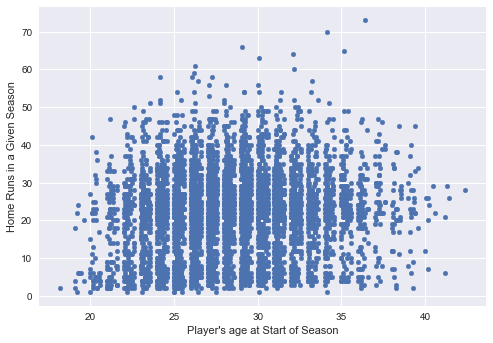

In [268]:

plt.scatter(elite_hr_hitters['age_at_season_start'],elite_hr_hitters['HR'], s=22)
plt.xlabel("Player's age at Start of Season")
plt.ylabel('Home Runs in a Given Season')
plt.show()

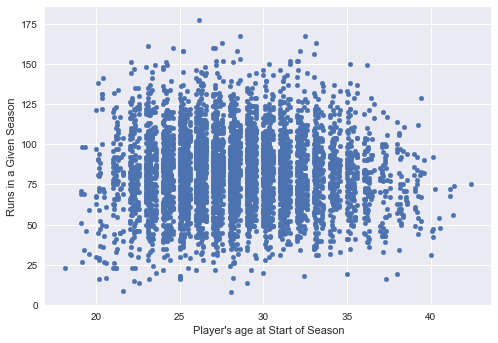

In [269]:
plt.scatter(elite_hr_hitters['age_at_season_start'],elite_hr_hitters['R'], s=22)
plt.xlabel("Player's age at Start of Season")
plt.ylabel('Runs in a Given Season')
plt.show()

### How do characteristics of elite run hitters differ from elite HR hitters? 

Although the differences shown below are tenative, elite run hitters on average tend to be light on their feet compared to HR hitters (weighing 7.22 lbs less).  Also, on average elite run hitters are almost an inch shorter than HR hitters. On average elite run hitters steal 7 more bases than elite home run hitters and get almost 19 more hits a season. Not suprisingly though elite run hitters get almost 50 more "at bats" than do elite HR hitters- meaning more oppurtunities for hitting.  

In [9]:
elite_run_hitters_vs_elite_HR_hitters = (elite_run_hitters.mean()) - (elite_hr_hitters.mean())

elite_run_hitters_vs_elite_HR_hitters

2B                      2.975237
3B                      1.242107
AB                     49.466678
BB                      7.132278
CS                      2.268720
G                       8.003396
GIDP                   -0.382352
H                      18.964562
HBP                     0.375409
HR                     -4.518859
HR_threshold                 NaN
IBB                    -0.681900
R                      14.806746
RBI                    -5.485885
SB                      7.360889
SF                     -0.074287
SH                      1.787343
SO                     -5.051665
age_at_season_start    -0.137368
birthDay                0.136910
birthMonth             -0.057498
birthYear               2.289293
deathDay               -0.149603
deathMonth              0.079005
deathYear               2.488499
height                 -0.753418
runs_threshold               NaN
stint                  -0.011741
weight                 -7.225621
yearID                  2.144222
dtype: flo

### Is it common for an elite hitter to be both an elite HR and run hitter?

It appears only 46.81% of elite hitters are both an elite run and elite HR hitter, indicating that it is  more common for an elite hitter to be elite in only one of the two categories. 

Being a great home run hitter may require a different skill set compared to the one necessary for an elite run hitter. Also elite home run hitters might "swing for the fences" more often than elite run hitters- which could result in more home runs but also more missed hits. These may explain why it is less common for players to be elite in both categories, but more research would be required to  make the claim. 
 

In [10]:
# Following is code is used to answer the question above.

list_of_elite_run_hitters = elite_run_hitters['playerID'].unique()
list_of_elite_hr_hitters = elite_hr_hitters['playerID'].unique()
list_of_total_players = batting_and_players_clean['playerID'].unique()

def runs_and_hr_hitters(list_of_elite_run_hitters, list_of_elite_hr_hitters):
    total = 0
    for hitter in list_of_elite_run_hitters:
        if hitter in list_of_elite_hr_hitters:
            total = total + 1
    return total

qty_of_elite_who_are_both_elite_run_and_hr_hitters = runs_and_hr_hitters(list_of_elite_run_hitters, list_of_elite_hr_hitters)

total_qty_of_elite_hr_and_run_hitters = ((len(list_of_elite_run_hitters)) - (qty_of_elite_who_are_both_elite_run_and_hr_hitters)) + (((len(list_of_elite_hr_hitters)) - (qty_of_elite_who_are_both_elite_run_and_hr_hitters))) + qty_of_elite_who_are_both_elite_run_and_hr_hitters

percentage_who_are_both_elite_HR_and_Run_hitters = (qty_of_elite_who_are_both_elite_run_and_hr_hitters * 1.0) / (total_qty_of_elite_hr_and_run_hitters * 1.0)

print "percent of elite hitters who are both elite HR and run hitters =", percentage_who_are_both_elite_HR_and_Run_hitters *100,"%"


percent of elite hitters who are both elite HR and run hitters = 46.8149646107 %


### How has the performance of elite hitters changed over time?

The two graphs below show the year over year change in the lower threshold per season for elite HR hitters and elite run hitters respectively.  

There has been a near linear increase in the lower threshold for HR’s hit per season since the 1880’s. However, the lower threshold for elite run hitters has approximated a leveling off after 1900. 

It’s difficult to speculate as to the cause of the disproportionate performance increases between the two populations, but the data suggests that when baseball was in its infancy their existed a substantial oppurtunity for improvement in elite home run hitter performance but not for run hitting performance. 

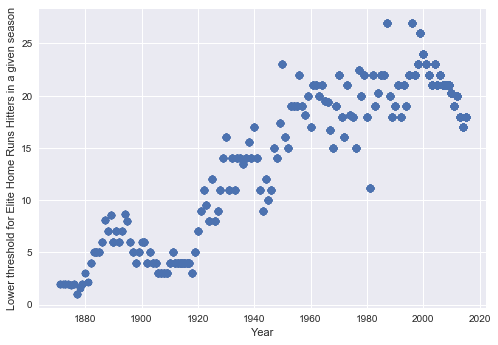

In [11]:
plt.scatter(elite_hr_hitters['yearID'],elite_hr_hitters['HR_threshold'])
plt.xlabel("Year")
plt.ylabel('Lower threshold for Elite Home Runs Hitters in a given season')
plt.show()

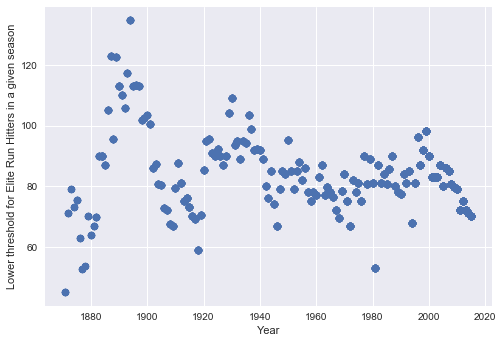

In [12]:
plt.scatter(elite_run_hitters['yearID'],elite_run_hitters['runs_threshold'])
plt.xlabel("Year")
plt.ylabel('Lower threshold for Elite Run Hitters in a given season')
plt.show()

### What is the correlation between elite HR/elite run hitters with  height , weight, and year?

The first bar graph shows a weak negative correlation between elite run hitters and height, weight, and year. 

The second bar graph shows the correlation between elite home run hitters and height, weight, and year. All three characteristics are at or near .5 which could suggest a positive correlation but would require further analysis. 

The data seems to indicate that height, weight, and year could have an impact on a players' ability to hit home runs. Potential explanations are that being larger in size can give players the power necessary to hit a baseball far enough to be considered a home run, and that over time baseball has influenced player's to become bigger and stronger. 


/Users/cure51/anaconda/envs/python2_work/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


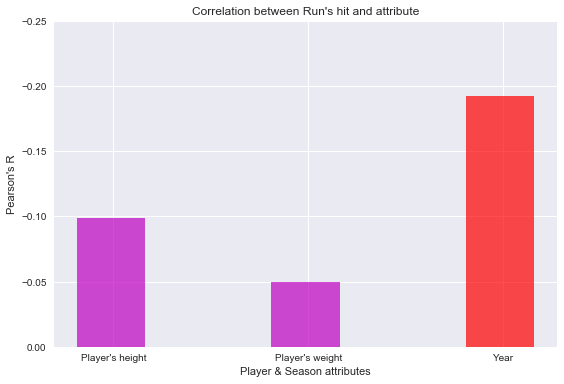

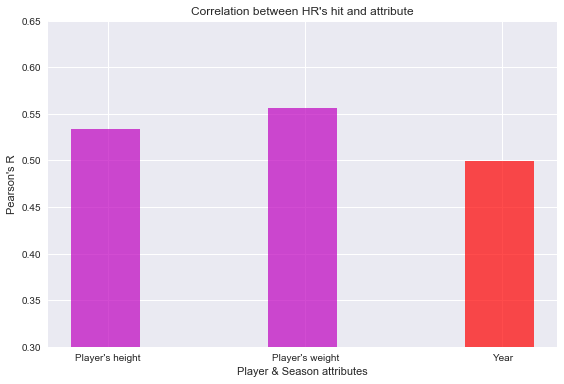

In [13]:
n_groups = 3

attributes = (elite_run_hitters['R'].corr(elite_run_hitters['height']),
            elite_run_hitters['R'].corr(elite_run_hitters['weight']),
            elite_run_hitters['R'].corr(elite_run_hitters['yearID']))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.7
error_config = {'ecolor': '0.3'}

Positive_Correlation = plt.bar(index, attributes, bar_width,
                 color= ('m', 'm', 'r'),
                 alpha=opacity,
                 error_kw=error_config)

plt.xlabel('Player & Season attributes')
plt.ylim([0, -.25])
plt.ylabel("Pearson's R")
plt.title("Correlation between Run's hit and attribute")
plt.xticks(index + bar_width / 25, ("Player's height", "Player's weight", 'Year'))
plt.legend()

plt.tight_layout()
plt.show()

# Elite HR hitters bar graph
n_groups = 3

attributes = (elite_run_hitters['HR'].corr(elite_run_hitters['height']),
            elite_run_hitters['HR'].corr(elite_run_hitters['weight']),
            elite_run_hitters['HR'].corr(elite_run_hitters['yearID']))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.7
error_config = {'ecolor': '0.3'}

Positive_Correlation = plt.bar(index, attributes, bar_width,
                 color= ('m', 'm', 'r'),
                 alpha=opacity,
                 error_kw=error_config)

plt.xlabel('Player & Season attributes')
plt.ylim([.3, .65])
plt.ylabel("Pearson's R")
plt.title("Correlation between HR's hit and attribute")
plt.xticks(index + bar_width / 25, ("Player's height", "Player's weight", 'Year'))
plt.legend()

plt.tight_layout()
plt.show()

# Part 2: Elite Hitters and Performance-Enhancing Drugs

### Since 1980, how have performance- enhancing drugs impacted performance statistics for elite HR and R hitters?

In this section  we  will compare the  population of elite hitters with the same population after players who were suspended for PED usage are removed (this population will be refered to as "drug free").

This investigation seeks to see if an impact from PED's is visible within the elite hitter population. 

In [14]:
# Import the data
players_using = pd.read_csv('/Users/cure51/Documents/Steriod_players.csv')
players_using.head()

,full name
0,Luis Gonz�lez
1,Danny Rios
2,C�sar Puello
3,Fautino de los Santos
4,Jordan Norberto


In [15]:
# The following code will be used to clean up a list that contains player names who were suspended for PED usage.

players_using_data_clean = players_using['full name'].str.replace(r'[^\w]', '')
players_using = players_using_data_clean

players_using.head()

0           LuisGonzlez
1             DannyRios
2            CsarPuello
3    FautinodelosSantos
4        JordanNorberto
Name: full name, dtype: object

In [16]:
# Create a new 'fullname' coloumn for elite_hr_hitters and elite_run_hitters so we that we have a
# common coloumn to reference with players_using.

full_name_hitters = elite_hr_hitters['nameFirst'] + elite_hr_hitters['nameLast']
elite_hr_hitters['fullname'] = full_name_hitters
full_name_runners = elite_run_hitters['nameFirst'] + elite_run_hitters['nameLast']
elite_run_hitters['fullname'] = full_name_runners

elite_run_hitters['fullname']

/Users/cure51/anaconda/envs/python2_work/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cure51/anaconda/envs/python2_work/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10              HankAaron
11              HankAaron
12              HankAaron
13              HankAaron
14              HankAaron
15              HankAaron
16              HankAaron
17              HankAaron
18              HankAaron
19              HankAaron
20              HankAaron
21              HankAaron
22              HankAaron
23              HankAaron
24              HankAaron
25              HankAaron
26              HankAaron
27              HankAaron
28              HankAaron
211            BobbyAbreu
212            BobbyAbreu
213            BobbyAbreu
214            BobbyAbreu
215            BobbyAbreu
216            BobbyAbreu
217            BobbyAbreu
220            BobbyAbreu
221            BobbyAbreu
222            BobbyAbreu
223            BobbyAbreu
               ...       
100232         RossYoungs
100233         RossYoungs
100234         RossYoungs
100236         RossYoungs
100237         RossYoungs
100238         RossYoungs
100255         RobinYount
100257      

In [20]:
list_of_unique_hr_hitters = elite_hr_hitters['fullname'].unique()
list_of_unique_run_hitters = elite_run_hitters['fullname'].unique()

# Test the lists
list_of_unique_hr_hitters
list_of_unique_run_hitters

array(['HankAaron', 'BobbyAbreu', 'JoseAbreu', ..., 'RichieZisk',
       'BenZobrist', 'DutchZwilling'], dtype=object)

In [21]:
identify_elite_users(players_using, list_of_unique_hr_hitters)

['RafaelPalmeiro',
 'MikeMorse',
 'MikeCameron',
 'MannyRamirez',
 'MarlonByrd',
 'RyanBraun',
 'NelsonCruz',
 'JhonnyPeralta',
 'AlexRodriguez']

In [22]:
# This function is used to identify players who used PED's and were also elite hitters:

def identify_elite_users(players_using, list_of_unique_elite_hitters):
    elite_and_PED_usage = []
    for player in players_using:
        if player not in elite_and_PED_usage:
            if player in list_of_unique_elite_hitters:
                elite_and_PED_usage.append(player)
    return elite_and_PED_usage
    

In [23]:
elite_users = (identify_elite_users(players_using, list_of_unique_run_hitters))
print elite_users

['RafaelPalmeiro', 'MikeMorse', 'MattLawton', 'MikeCameron', 'MannyRamirez', 'MarlonByrd', 'MelkyCabrera', 'RyanBraun', 'NelsonCruz', 'JhonnyPeralta', 'AlexRodriguez', 'CameronMaybin', 'DeeGordon']


In [24]:
def deleting_users(elite_users, elite_hitters):
    for elite_user in elite_users:
        elite_hitters.drop(elite_hitters[elite_hitters['fullname'] == elite_user].index, inplace = True)
    

In [25]:
# drugfree_hr_hitters/drugfree_run_hitters is going to be used to create a table of druge free elite players from 1980 on.
drugfree_hr_hitters = pd.DataFrame(elite_hr_hitters)
drugfree_run_hitters = pd.DataFrame(elite_run_hitters)

deleting_users(elite_users, drugfree_run_hitters)
deleting_users(elite_users, drugfree_hr_hitters)

# Population of elite hitters not suspended for performancing- enhancing drugs (PED's) from 1980 on:
drugfree_run_hitters_1980on = drugfree_run_hitters.ix[drugfree_run_hitters['yearID'] >= 1980]
drugfree_hr_hitters_1980on = drugfree_hr_hitters.ix[drugfree_hr_hitters['yearID'] >= 1980]

# Population of elite hitters from 1980 on: 
run_hitters_1980on = elite_run_hitters.ix[elite_run_hitters['yearID'] >= 1980]
hr_hitters_1980on = elite_hr_hitters.ix[elite_hr_hitters['yearID'] >= 1980]

# Qty of elite run hitters who where suspended for PED's:
print len(run_hitters_1980on) -len(drugfree_run_hitters_1980on)

# Qty of elite HR hitters who where suspended for PED's:
print len(hr_hitters_1980on) -len(drugfree_hr_hitters_1980on) 

66
73


In [26]:
# Test to see that drug free population does not contain player suspended for PED's and that player remains in elite 
# hitter population.

drugfree_run_hitters_1980on[drugfree_run_hitters_1980on['fullname'] == 'AlexRodriguez']


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,BB,SO,IBB,HBP,SH,SF,GIDP,age_at_season_start,runs_threshold,fullname


In [27]:
hr_hitters_1980on[hr_hitters_1980on['fullname'] == 'AlexRodriguez'].head(3)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,BB,SO,IBB,HBP,SH,SF,GIDP,age_at_season_start,HR_threshold,fullname
77482,rodrial01,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,59.0,104.0,1.0,4.0,6.0,7.0,15.0,20.416667,27.0,AlexRodriguez
77483,rodrial01,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,41.0,99.0,1.0,5.0,4.0,1.0,14.0,21.416667,22.0,AlexRodriguez
77484,rodrial01,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,45.0,121.0,0.0,10.0,3.0,4.0,12.0,22.416667,23.0,AlexRodriguez


In [28]:
# A view of the mean for "drug free" elite run or HR hitters below shows little difference compared to all elite 
# run or HR hitters. Although these results are tenative until further statistical analysis can confirm these findings.

print drugfree_run_hitters_1980on.mean(); print ""; print run_hitters_1980on.mean();
print "";
print drugfree_hr_hitters_1980on.mean(); print ""; print hr_hitters_1980on.mean()

birthYear              1970.526817
birthMonth                6.835589
birthDay                 16.185464
deathYear              2009.729730
deathMonth                5.189189
deathDay                 14.000000
weight                  197.392481
height                   72.908271
yearID                 1999.612531
stint                     1.000000
G                       148.883709
AB                      566.753383
R                        95.219549
H                       165.103258
2B                       32.113784
3B                        4.043609
HR                       22.522807
RBI                      84.990977
SB                       16.838095
CS                        5.791479
BB                       65.792982
SO                       96.277193
IBB                       6.642105
HBP                       5.402005
SH                        2.222055
SF                        5.164912
GIDP                     11.995990
age_at_season_start      28.615664
runs_threshold      

## "Drug  Free" elite HR hitters vs. all elite HR hitters

The plot below traces the  average  HR's hit per season by elite HR hitters for  two  populations: drug free elite HR
hitters, and all elite HR hitters (which would include players suspended for PED's). The  visable magento line suggests that little variation exists between HR's hit per season between the two populations.

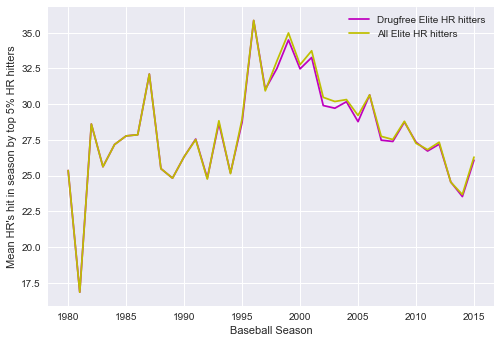

In [29]:
import pylab 
x1 = range(1980, 2016)
y1 = drugfree_hr_hitters_1980on.groupby('yearID')['HR'].mean()
x2 = range(1980, 2016)
y2 = hr_hitters_1980on.groupby('yearID')['HR'].mean()
plt.ylabel("Mean HR's hit in season by top 5% HR hitters")
plt.xlabel('Baseball Season')
pylab.plot(x1, y1, '-m', label='Drugfree Elite HR hitters')
pylab.plot(x2, y2, '-y', label='All Elite HR hitters')
pylab.legend(loc='upper right')
plt.show()


## "Drug  Free" elite run hitters vs. all elite run hitters

The plot below traces the  average  run's hit per season by elite run hitters for two  populations: drug free elite run hitters, and all elite R hitters (which would include players suspended for PED's). The visable red line shows that their is little variation between R's hit per season between the two populations.

These results are tenative and would require a deeper statistical test.

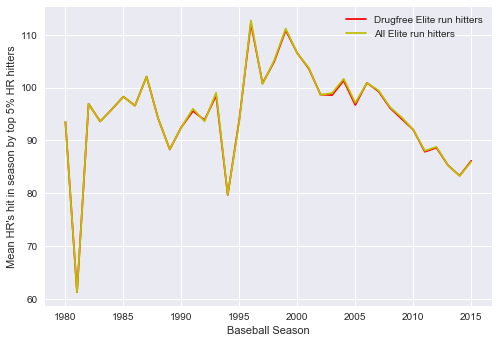

In [30]:
import pylab 
x1 = range(1980, 2016)
y1 = drugfree_run_hitters_1980on.groupby('yearID')['R'].mean()
x2 = range(1980, 2016)
y2 = run_hitters_1980on.groupby('yearID')['R'].mean()
plt.ylabel("Mean HR's hit in season by top 5% HR hitters")
plt.xlabel('Baseball Season')
pylab.plot(x1, y1, 'r', label='Drugfree Elite run hitters')
pylab.plot(x2, y2, 'y', label='All Elite run hitters')
pylab.legend(loc='upper right')

pylab.show()

### Considerations for  comparison of elite "drug free" and  elite hitters

The "drug free" population potentially underestimates the actual quantity of players who took performance- enhancing drugs. Also it removes a player’s potential contribution to the statistical results for all baseball seasons- even
if the player was only suspended for a single season or game. This has the ability to skew the results by overemphasizing the impact PED's had on hitting statistics for a given season. However, it’s also possible an additional number of elite players used PED’s but were never suspended; thus they would remain in the "drug free" population. This potentially would have the ablity to make the statistical differences between the two populations more extreme.

### Conclusions- Part 2

The impact from removing players suspended for PED’s appears to be minimal based on the seemingly lack of significant differences between the two populations. However, the increased performance trends of elite hr hitters year over year compared to the relatively level performance of elite run hitters year over year could be explained by PED usage (although a deep and robust analysis would be necassary to make this claim). With that said, increases in size and strength do seem to improve a players’ ability to hit home runs but would probably not give a player the same level of advantage for run hitting; thus undocumented PED usage could be part of the cause for continued performance increases of elite hr hitters over time while run hitting performance remained flat. 


## References

Bar graph created with help from: http://matplotlib.org/examples/pylab_examples/barchart_demo.html

List of suspended players found here:
https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_suspended_for_performance-enhancing_drugs

